In [9]:
from __future__ import print_function, division
import os, bz2, json, time, sys
from datetime import timedelta

import math
import numpy as np
import pandas as pd
import matplotlib as mpl

from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
engage_dataset_base = "G:/MLCV dataset/engagement'16/tweeted_videos"

categories_eligible = ["autos", "comedy","education","entertainment", \
                       "film","gaming","howto","music",\
                       "news","people","science","sports",\
                       "travel"]

In [3]:
def engage_read(category, eval_days = [90, 135, 180, 225, 270]):    
    with open(os.path.join(engage_dataset_base, "{}.json".format(category)), "r") as f:
        dataset_json = f.readlines()
    dataset = {}
    
    vids_set = set()
    for line in tqdm(dataset_json, desc="{} in engage".format(category)):
        record = json.loads(line)
        try:        
            day = [int(x) for x in record['insights']['days'].split(",")]                        
            if len(day) < eval_days[-1]: # filter out videos of short history
                continue                
            vals = {
                "day_zero": record['insights']['startDate'], 
                "days": day, 
                "viewCounts": [int(x) for x in record['insights']['dailyView'].split(",")],
                "shares": [int(x) for x in record['insights']['dailyShare'].split(",")],
            }
        except:
            continue
        dataset[record['id']] = vals
        
        if record['id'] in vids_set: 
            continue
        else: 
            vids_set.add(record['id'])
    print("Engage {} size: {}".format(category, len(dataset.keys())))
    return dataset

In [4]:
category = categories_eligible[1]
engage_dataset = engage_read(category)
vids = list(engage_dataset.keys())
num = 0

comedy in engage: 100%|█████████████████████████████████████████████████████| 138068/138068 [00:11<00:00, 12046.37it/s]


Engage comedy size: 31519


In [29]:
def visual_single_scatter(ax, vid, vdata):
    days, views = vdata["days"], vdata["viewCounts"]
    ax.scatter(days, views, s = 6.0)
    ax.set_title("Viewcounts for video {}".format(vid))

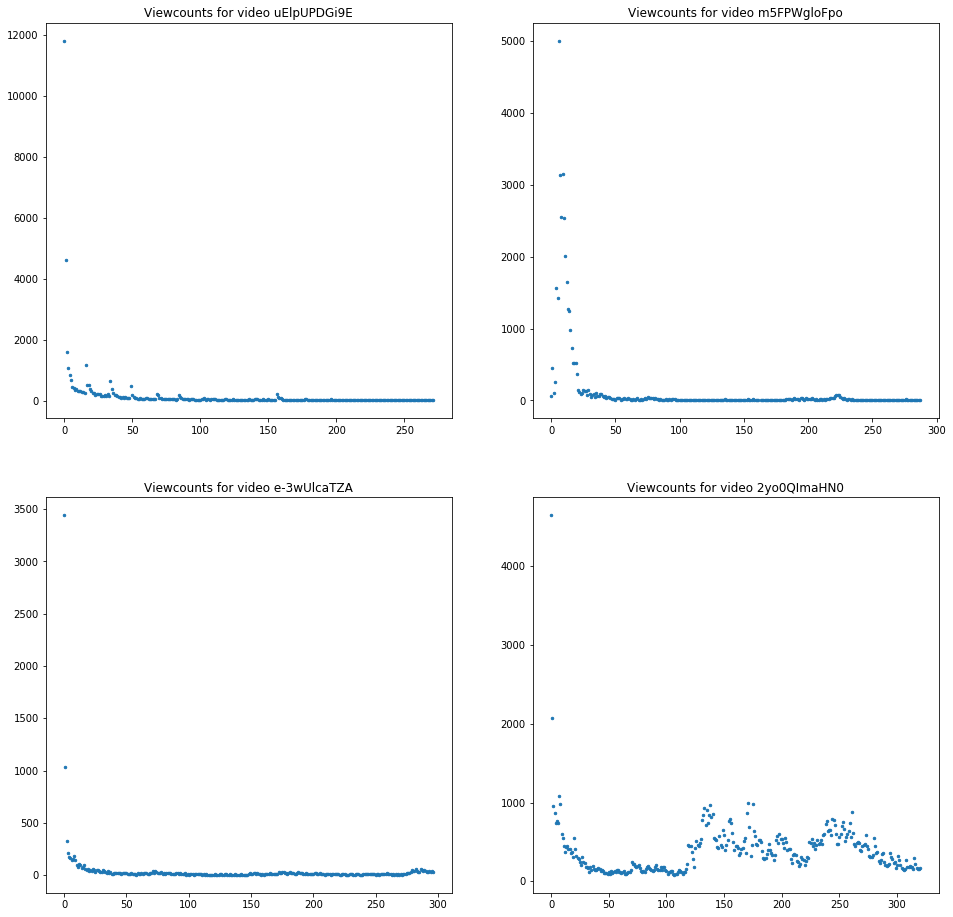

In [24]:
fig = plt.figure(figsize=(16, 16))
for num in range(4):
    ax = fig.add_subplot(2,2,num+1)
    vid = vids[num]
    visual_single_scatter(ax, vid, engage_dataset[vid])

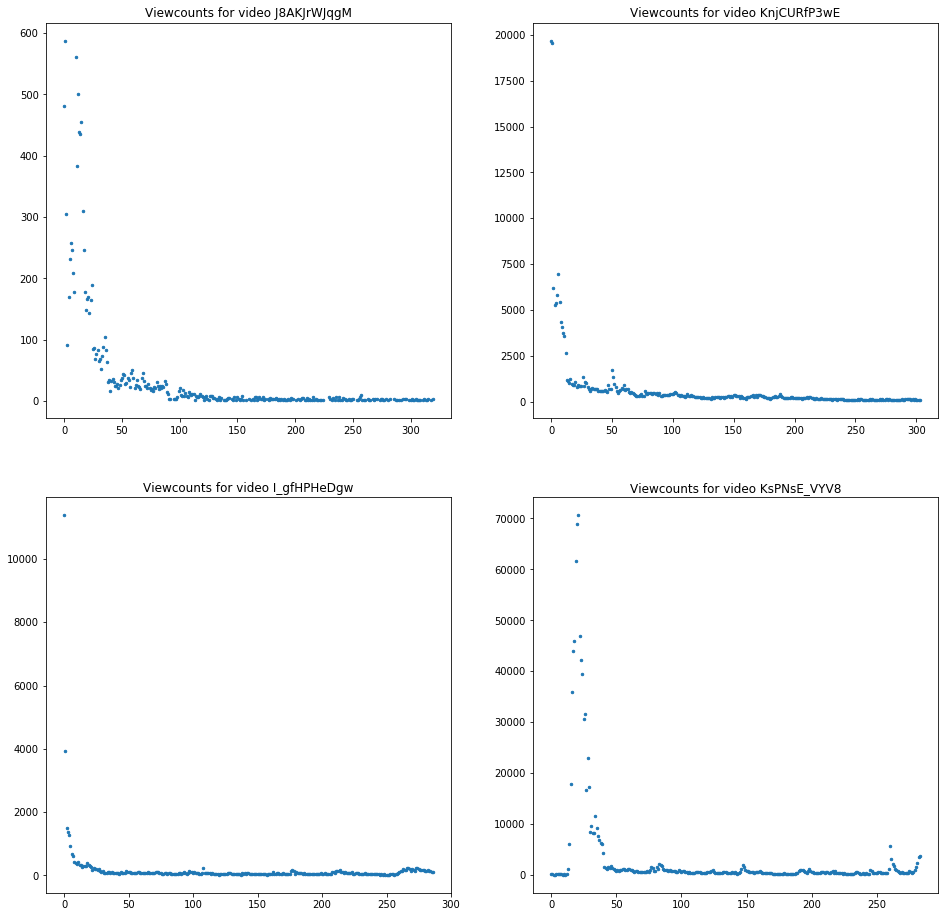

In [27]:
fig = plt.figure(figsize=(16, 16))
for num in range(4, 8):
    ax = fig.add_subplot(2,2,(num)%4+1)
    vid = vids[num]
    visual_single_scatter(ax, vid, engage_dataset[vid])

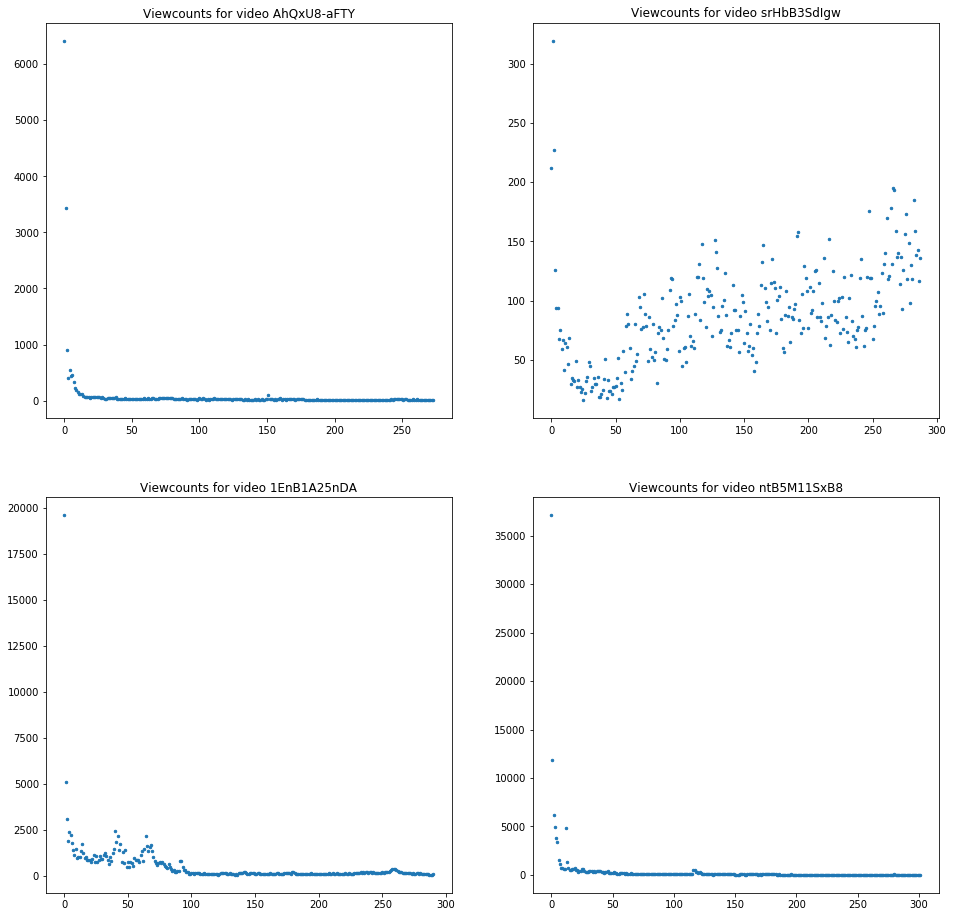

In [28]:
fig = plt.figure(figsize=(16, 16))
for num in range(8, 12):
    ax = fig.add_subplot(2,2,(num)%4+1)
    vid = vids[num]
    visual_single_scatter(ax, vid, engage_dataset[vid])

In [30]:
def visual_single_cdf(ax, vid, vdata):
    days, views = vdata["days"], vdata["viewCounts"]
    
    view_cdf = []
    view_acc, view_total = 0, sum(views)
    for i in range(len(views)):
        view_acc += views[i]
        view_cdf.append(view_acc/view_total)
    
    ax.bar(days, view_cdf)
    ax.set_title("Viewcount cdf for video {}".format(vid))

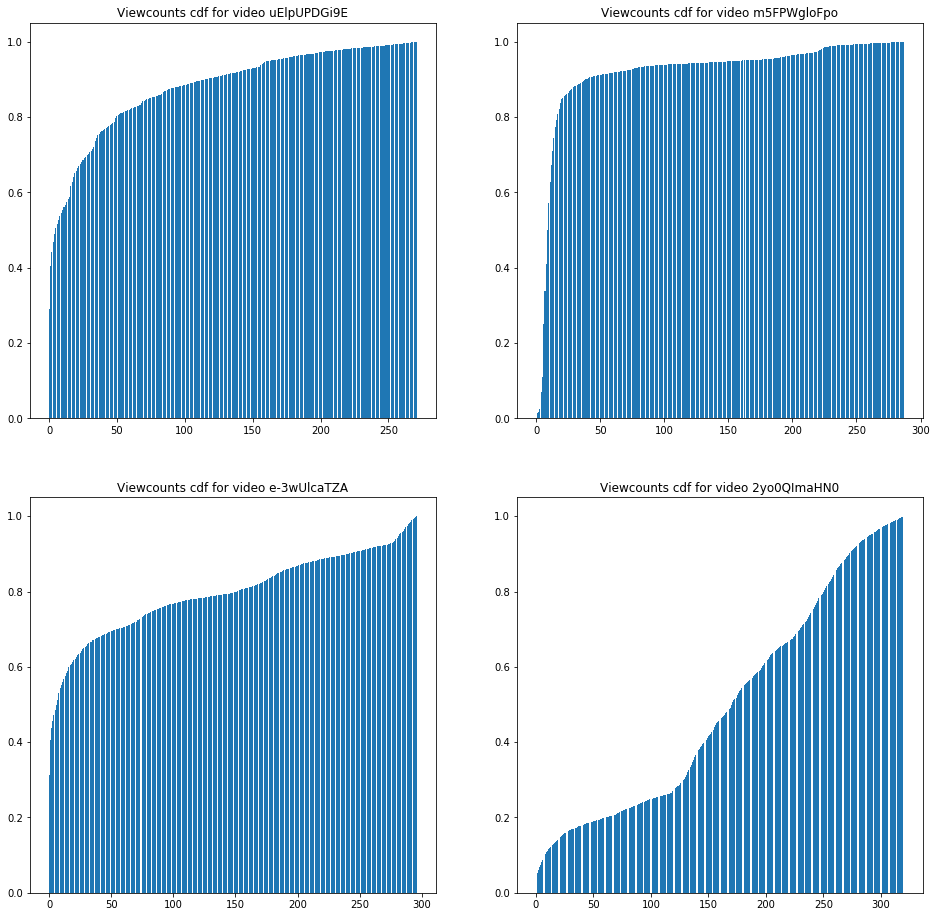

In [31]:
fig = plt.figure(figsize=(16, 16))
for num in range(4):
    ax = fig.add_subplot(2,2,(num)%4+1)
    vid = vids[num]
    visual_single_cdf(ax, vid, engage_dataset[vid])

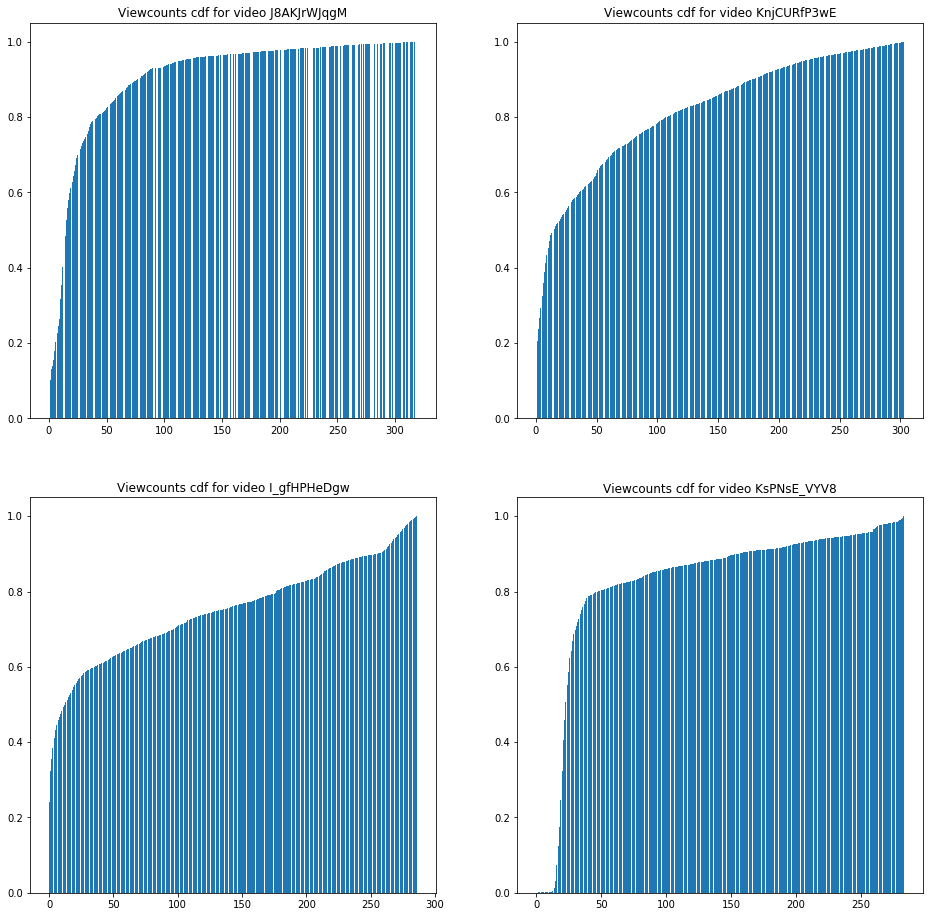

In [32]:
fig = plt.figure(figsize=(16, 16))
for num in range(4, 8):
    ax = fig.add_subplot(2,2,(num)%4+1)
    vid = vids[num]
    visual_single_cdf(ax, vid, engage_dataset[vid])

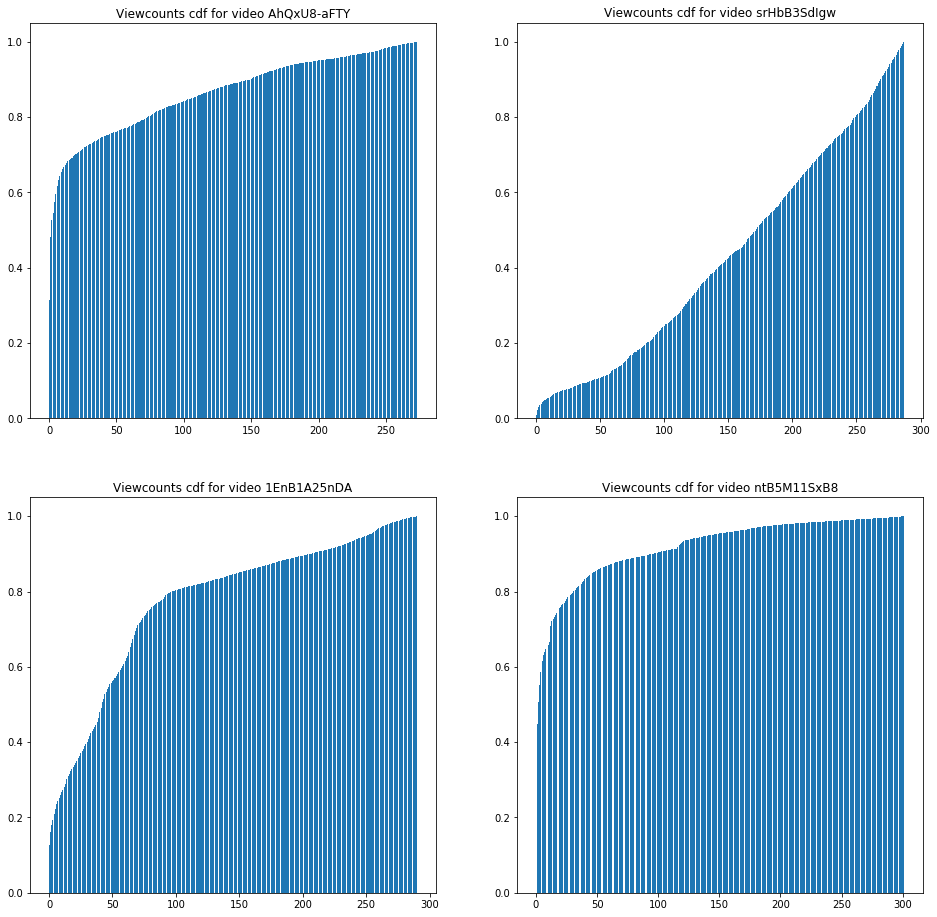

In [33]:
fig = plt.figure(figsize=(16, 16))
for num in range(8, 12):
    ax = fig.add_subplot(2,2,(num)%4+1)
    vid = vids[num]
    visual_single_cdf(ax, vid, engage_dataset[vid])